In [1]:
import os
import numpy as np
import scanpy as sc
import anndata as ad
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(5, 5)
plt.rcParams['figure.dpi'] = 150
sc.settings.verbosity = 3
sc.logging.print_versions()
#results_file = './write/results.h5ad'


%load_ext autoreload
%autoreload 2 

scanpy==1.4.5.post3 anndata==0.7.1 umap==0.3.10 numpy==1.17.4 scipy==1.3.2 pandas==0.25.3 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [2]:
import rpy2.rinterface_lib.callbacks
import logging
import warnings
from rpy2.robjects import pandas2ri
import anndata2ri


# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

In [3]:
%%R
# Load all the R libraries we will be using in the notebook
library(scran)
#library(RColorBrewer)
#library(slingshot)
#library(monocle)
#library(gam)
#library(clusterExperiment)
#library(ggplot2)
#library(plyr)
library(MAST)

In [4]:
adata = sc.read('./data/data_scanorama_hvg4000.h5ad')

In [5]:
adata.obs.columns

Index(['G2M_score', 'S_score', 'adult_stress', 'baseline', 'batch',
       'condition', 'log_counts', 'louvain', 'louvain_high_res', 'mt_fraction',
       'n_counts', 'n_genes', 'phase', 'sample_id', 'sample_name',
       'size_factors'],
      dtype='object')

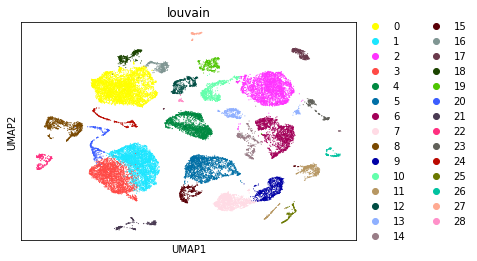

In [6]:
sc.pl.umap(adata, color='louvain')

In [7]:
marker_genes = dict()
marker_genes['Oligodendrocyte Progenitor Cells (OPCs)'] = ['Clql1', 'Pdgfra', 'Matn5', 'Olig1', 'Lhfpl3', 'Olig2', 'Serpine2', 'Ptprz1', 'Neu4', 'Nxph1', 'Cdo1', 'Vcan', 'Cacng4', 'Tmem100', 'Olfm2', 'Tmem176b', 'Tnr', 'Bcan', 'Marcks', 'Epn2', 'Cspg4', 'Mpmp15', 'Ednrb', 'Emid1', 'Traf4', 'Cntn1', 'Scrg1', 'Armh4', 'Gpr17']
marker_genes['Pericytes'] = ['Vtn', 'Higdb1b', 'Rgs5', 'Ndufa4l2', 'Igfbp7', 'Myl9', 'Cald1', 'Atp13a5', 'Rgs4', 'P2ry14', 'Slc19a1', 'Pdgfrb', 'Cox4i2', 'Slc6a20a', 'Ifitm1', 'Gper1', 'Atpla2', 'Pth1r', 'Nbl1', 'Ebf1', 'Art3', 'Evalb', 'Ptn', 'Kcnj8', 'Aspn', 'Myol1b', 'Abcc9', 'Sod3', 'Ifitm2', 'Gucy1b1']
marker_genes['GABA Neurons'] = ['Snhg11', 'Meg3', 'Nap1l5', 'Syt1', 'Vsnl1', 'Zwint', 'Stmn3', 'Ttc3', 'Snap25', 'Rnf227', 'Atp1b1', 'Ndrg4', 'Tubb3', 'Rtn1', 'Cit', 'Sncb', 'Tmsb10', 'Clstn3', 'Nrxn3', 'Tatdn1', 'Cplx1', 'Rab3a', 'Gad2', 'Scg5', 'Syp', 'Resp18', 'Gad1', 'Stmn2', 'Apt1a3', 'Sult4a1']
marker_genes['Cajal-Retzius Neurons'] = ['Ndnf', 'Reln', 'Snhg11', 'Diablo', 'Cacna2d2', 'Nhlh2', 'Lhx1os', 'Stmn1', 'Ramp1', 'Pcp4', 'Isoc1', 'Cxcl12', 'Slc17a6', 'Syndig1l', 'Nr2f2', 'Calb2', 'Tubb5', 'Stmn2', 'Pkib', 'Tbr1', 'Ndn', 'Gap43', 'Trp73', 'Twsg1', 'Lhx1', 'Elavl4', 'Tmem163', 'Cit', 'Ass1', 'Cd200']
marker_genes['Choroid Plexus Epithelial Cells'] = ['Ttr', 'Enpp2', '1500015O10Rik', 'Igfbp2', 'Calml4', 'Spint2', 'Clic6', 'Rbp1', 'Folr1', 'Fxyd1', 'Trpm3', '2900040C04Rik', 'Kl', 'Prlr', 'Apt5g1', 'Chchd10', 'Hemk1', 'Sostdc1', 'Cab39l', 'Kcnj13', 'Ppp1r1b', 'Vamp8', 'Bsg', 'Msx1', 'Wfdc2', 'Ifi27', 'Arl6ip1', 'Stk39', 'Prdx5', 'Ndufa4']
marker_genes['Ependymal Cells'] = ['Tmem212', 'Mia', 'Ccdc153', 'Rarres2', 'Rsph1', 'Dbi', 'Fam183b', 'Dynlrb2', 'Gm19935', 'Cd24a', 'Meig1', '1110017D15Rik', 'Vim', 'S100a6', 'Tubb4b', 'Tm4sf1', 'Crip1', 'Riiad1', 'Pltp', '4933434E20Rik', 'Calml4', 'Nuf2', 'Tmem107', 'Ascc1', 'Chchd10', 'Slc38a1', 'Anxa5', 'Crygn', 'Cfap126', 'Fam166b']
marker_genes['CCK Neurons'] = ['Meg3', 'Cck', 'Nrgn', 'Snap25', 'Snca', 'Snhg11', 'Syt1', 'Atp6v1g2', 'Chn1', 'Mllt11', 'Calm2', 'Gng3', 'Ppp3ca', 'Atp2b1', 'Dynll1', 'Ctxn1', 'Ywhah', 'Rprml', 'Selenow', 'Stmn2', 'Neurod6', 'Hpca', 'Cnih2', 'Scn1b', 'Gap43', 'Serp2', 'Prkcb', 'Nptx1', 'Syn2', 'Sh3gl2']
marker_genes['Neural Progenitor Cells (NPCs)'] = ['Sox11', 'Sox4', 'Igbbpl1', 'Tubb5', 'Marcksl1', 'Nfib', 'Tubb2b', 'Nfix', 'Rplp0', 'Ipt1', 'Tuba1a', 'Tmsb10', 'Hmgb3', 'Hnrnpa1', 'Hmgn2', 'Stmn1', 'Cdk4', 'Ptma', 'Nnat', 'Zbtb20', 'Tubb3', 'Prdx2', 'Tcf4', 'H3f3a', 'H3f3b', 'Ppp1r14b', 'Cd24a', 'Dpysl3', 'Hmgn1', 'Ccnd2']
marker_genes['Vascular Cells'] = ['Acta2', 'Crip1', 'Myl9', 'Tagln', 'Tpm2', 'Igfbp7', 'Cald1', 'Myh11', 'Tpm1', 'Mustn1', 'Mylk', 'Rgs4', 'Myl6', 'Map3k7cl', 'Cavin1', 'Pln', 'Sncg', 'Filip1l', 'Bcam', 'Vim', 'Mgp', 'Flna', 'Gm13889', 'Des', 'Rbpms', 'Lbh', 'Dstn', 'Rgs5', 'Hspb1', 'Gja4']
marker_genes['Macrophages'] = ['Lyz1', 'Pf4', 'Mrc1', 'C1qc', 'Fcer1g', 'Tyrobp', 'C1qb', 'C1qa', 'Dab2', 'Ctsb', 'Ftl1', 'Ms4a7', 'Fcgr3', 'Cd68', 'Cyba', 'F13a1', 'Ctsc', 'Maf', 'Selenop', 'Cbr2', 'Fcrls', 'Grn', 'Apoe', 'B2m', 'Stab1', 'Ms4a6c', 'Lgals1', 'Csf1r', 'Hexa', 'Fcgrt']
marker_genes['Meningeal Cells'] = ['Dcn', 'Itih5', 'Nupr1', 'Slc6a13', 'Apod', 'Igfbp2', 'Vtn', 'Cxcl12', 'Pcolce', 'Bgn', 'Ptn', 'Col1a2', 'Col1a1', 'Lum', 'Slc6a20a', 'Edn3', 'Ifitm2', 'Laptm4a', 'Timp3', 'Colec12', 'Spp1', 'Serping1', 'Serpinh1', 'Serpinf1', 'Slc7a11', 'Emp3', 'Rcn3', 'Col3a1', 'Zic1', 'Cp']
marker_genes['Astrocytes'] = ['Aldoc', 'Clu', 'Slc1a3', 'Ntsr2', 'Sic1a2', 'Plpp3', 'Mt2', 'Atp1a2', 'Gja1', 'Apoe', 'Sparcl1', 'Mt1', 'Cldn10', 'Gpr37l1', 'Ndrg2', 'Pla2g7', 'Ptprz1', 'Ttyh1', 'Cspg5', 'Mlc1', 'Prdx6', 'Gstm1', 'Cst3', 'Ntrk2', 'Scg3', 'Atp1b2', 'Mfge8', 'Tspan7', 'Mt3', 'Tmem47']
marker_genes['Oligodendrocytes'] = ['Plp1', 'Cldn11', 'Mbp', 'Cnp', 'Mag', 'Trf', 'Mobp', 'Mog', 'Cryab', 'Sept4', 'Mal', 'Car2', 'Ermn', 'Qdpr', 'Apod', 'Ppp1r14a', 'Tubb4a', 'Csrp1', 'Enpp2', 'Stmn4', 'Pllp', 'Gsn', 'Gpr37', 'Aplp1', 'Ptgds', 'Aspa', 'Tspan2', 'Opalin', 'Fez1', 'Nkx6-2']
marker_genes['Glut. Neurons'] = ['Grin2b', 'Atp1b1', 'Rtn1', 'Ppp3ca', 'Atp2b1', 'Snca', 'Chn1', 'Camk2b', 'Gria2', 'Meg3', 'Camk2a', 'Syt1', 'Gria1', 'Nrgn', 'Olfm1', 'Snap25', 'Camkv', 'Slc17a7', 'Ly6h', 'Plppr4', 'Nell2', 'Grin2a', 'Caly', 'Cnih2', 'Syp', 'Ttc3', 'Ncdn', 'Map1b', 'Sncb', 'Calm2']
marker_genes['Endothelial Cells'] =['Cldn5', 'Ly6c1', 'Itm2a', 'Bsg', 'Flt1', 'Igfbp7', 'Pltp', 'Slco1a4', 'Pglyrp1', 'Klf2', 'Ly6a', 'Slc2a1', 'Esam', 'Ramp2', 'Egfl7', 'Id1', 'Spock2', 'Myl12a', 'Sgms1', 'Id3', 'Hspp1', 'Tsc22d1', 'Vwa1', 'Slco1c1', 'Slc9a3r2', 'Ptprb', 'H2-D1', 'Sparc', 'Ifitm3', 'Abcg2']
marker_genes['Microglia'] = ['Hexb', 'C1qa', 'Ctss', 'P2ry12', 'Csf1r', 'C1qb', 'C1qc', 'Selplg', 'Lgmn', 'Ctsd', 'Laptm5', 'Tmem119', 'Cx3cr1', 'Gpr34', 'Tyrobp', 'Fcer1g', 'Cd53', 'Cst3', 'Trem2', 'Vsir', 'Fcrls', 'Sparc', 'Rnase4', 'Fcgr3', 'Ly86', 'Itgb5', 'Unc93b1', 'Rgs10', 'Lpcat2', 'B2m']
marker_genes['Committed Oligodendrocyte Progenitors (COPs)'] = ['Gpr17', 'Fyn', 'Tnr', 'Cd9', 'Lims2', 'Neu4', 'Sirt2', 'Mpzl1', 'Bmp4', 'Col9a3', 'Tuba1a', 'S100b', 'Bcas1', 'Mycl', 'Enpp6', 'Vcan', 'Sulf2', 'Olig2', 'Olig1', 'Marcks', 'Slc44a1', 'Matn4', 'Igsf9b', 'Sh3bp4', 'Chn2', 'Pllp', 'Rnd2', 'Dynll2', 'Pak4', 'Traf4']

In [8]:
sc.tl.rank_genes_groups(adata, groupby='louvain', key_added='rank_genes_louvain')

ranking genes


/home/icb/carlo.dedonno/python/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


    finished: added to `.uns['rank_genes_louvain']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:15)


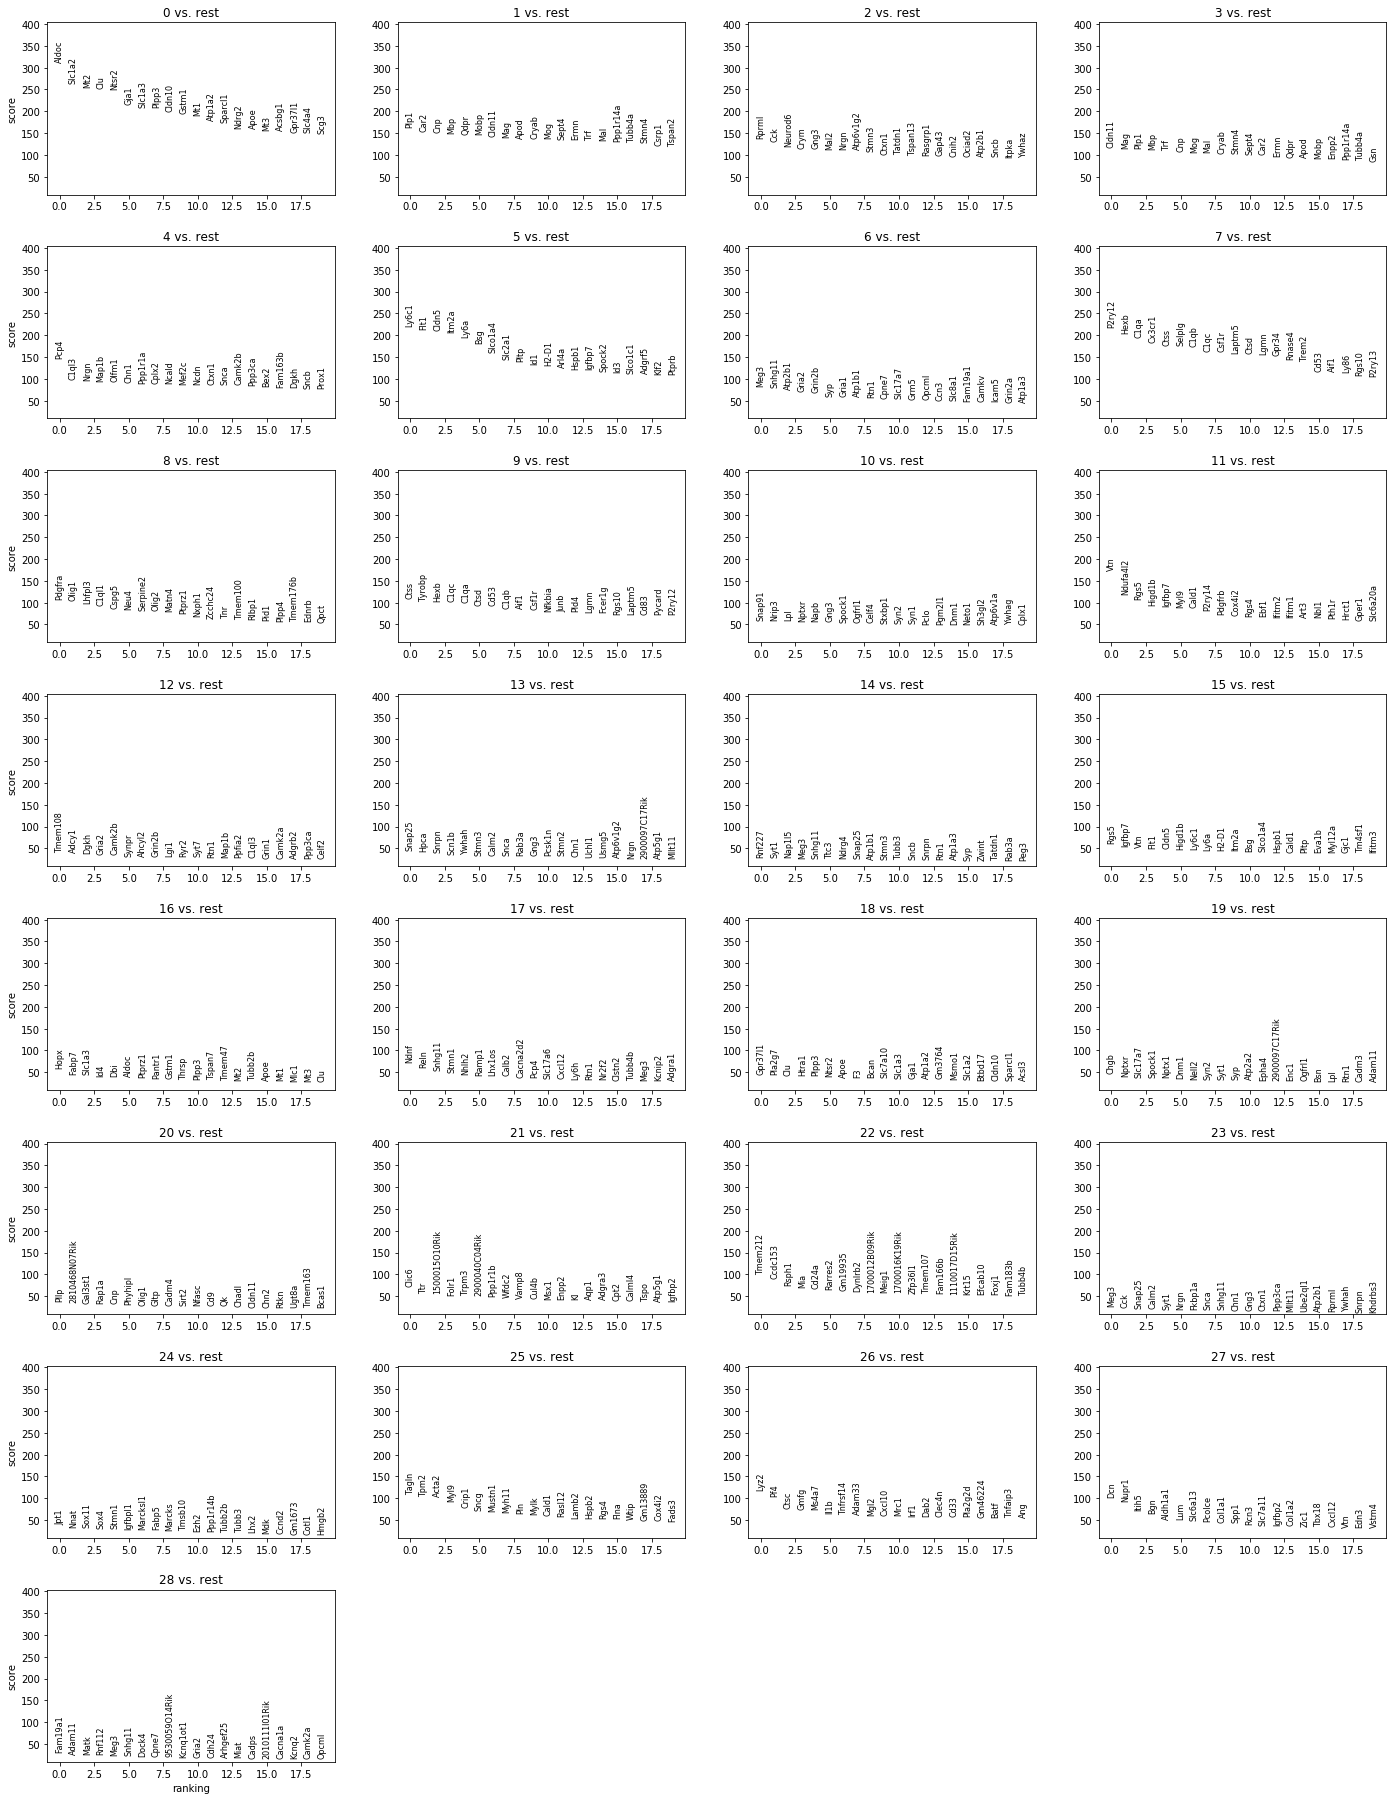

In [9]:
sc.pl.rank_genes_groups(adata, key='rank_genes_louvain')

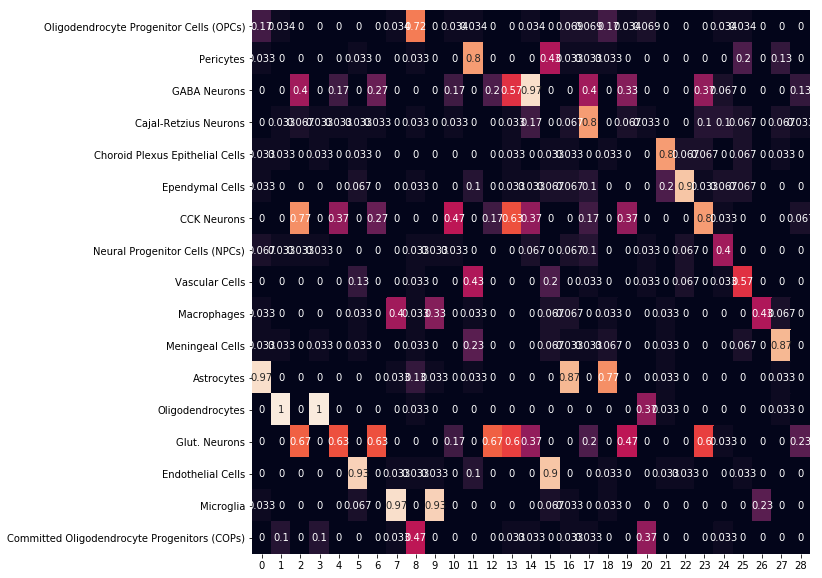

In [10]:
plt.rcParams['figure.figsize'] = (10, 10)
cell_annotation_norm = sc.tl.marker_gene_overlap(adata, marker_genes, key='rank_genes_louvain', normalize='reference')
sns.heatmap(cell_annotation_norm, cbar=False, annot=True)

In [11]:
cell_annotation_norm.idxmax()

0                                  Astrocytes
1                            Oligodendrocytes
2                                 CCK Neurons
3                            Oligodendrocytes
4                               Glut. Neurons
5                           Endothelial Cells
6                               Glut. Neurons
7                                   Microglia
8     Oligodendrocyte Progenitor Cells (OPCs)
9                                   Microglia
10                                CCK Neurons
11                                  Pericytes
12                              Glut. Neurons
13                                CCK Neurons
14                               GABA Neurons
15                          Endothelial Cells
16                                 Astrocytes
17                      Cajal-Retzius Neurons
18                                 Astrocytes
19                              Glut. Neurons
20                           Oligodendrocytes
21            Choroid Plexus Epith

In [12]:
adata.rename_categories('louvain', ['Astro 1', 'Oligo 1', 'CCK 1', 'Oligo 2', 'Glut 1', 'Endothelial',\
                                    'Glut 2', 'Microglia 1', 'OPCs', 'Microglia 2', \
                                    'CCK 2 (?)', 'Pericytes', 'Glut 3', 'CCK 3', 'GABA', \
                                    'Endothelial 2', 'Astro 2', 'Cajal-Retzius', 'Astro 3', \
                                    'Neurons (?)', 'Oligo (?)', 'Choroid Plexus', 'Ependymal', \
                                    'CCK 4', 'NPCs', 'Vascular', 'Macrophages', 'Meningeal', '??'])

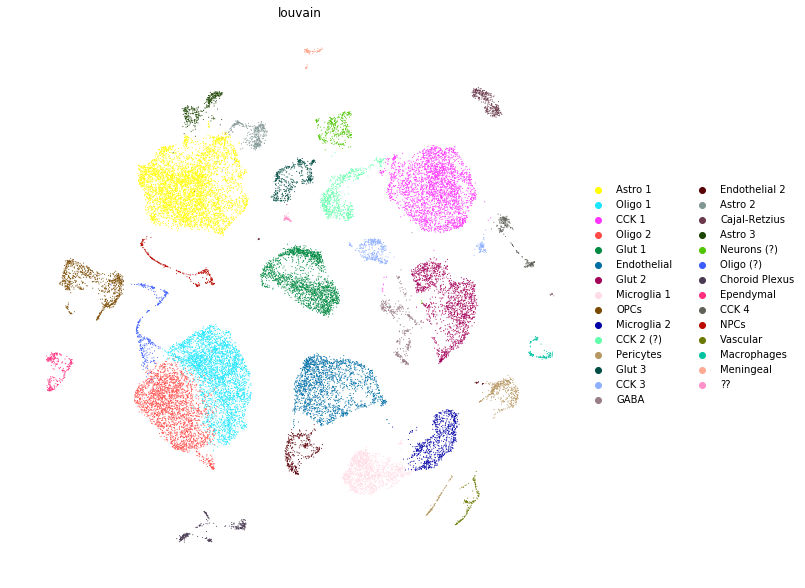

In [13]:
sc.pl.umap(adata, color='louvain', frameon=False)

In [5]:
adata_norm = sc.read('./data/data_norm.h5ad')

In [6]:
adata_norm.obs = adata.obs

In [7]:
adata_norm_bl = adata_norm[adata_norm.obs['baseline'] == 'BL']

In [8]:
adata_norm_bl.obs = adata_norm_bl.obs.rename({'adult_stress': 'condition'})

In [9]:
from rpy2 import robjects
def mast_de_groups(adata, groupby, save):
    '''Compute differential expression with the MAST package by treatment covariate within clusters provided as "groupby" and export as excel file'''
    
    #if groupby not in ['louvain_final', 'louvain_three']:
    #    raise NotImplementedError("This function is only implemented to be used with 'louvain_final' and 'louvain_three' group labels")
    
    # Define R function to run MAST analysis
    robjects.r('''
        mast_de_r <- function(adata, obs, var, clusters, groupby){
            #Prepare data sets for SingleCellExperiment data structure conversion
            #obs['wellKey'] = row.names(obs)
            #var['primerid'] = row.names(var)
            print('Deploying to R...')
            #Convert to SingleCellExperiment type
            #sca <- FromMatrix(exprsArray=data_mat, fData=var)
            sca <- SceToSingleCellAssay(adata, class = "SingleCellAssay")
            #Compute Gene detection rate
            colData(sca)$n_genes = scale(colData(sca)$n_genes)

            #Create a vector that will hold all the DE results
            output <- vector("list", length(clusters))

            count <- 0
            print('Begin computation...')
            #Loop over all louvain clusters
            for (i in clusters){
                count <- count+1
                print(i)
                #Create data subsets which should be used for testing
                if (groupby=='louvain_final') {
                    sca_sub <- subset(sca, with(colData(sca), louvain_final==i))
                } else if (groupby=='louvain_r1') {
                    sca_sub <- subset(sca, with(colData(sca), louvain_r1==i))
                } else {
                    stop()
                }
                print('debug0')
                #Filter out non-expressed genes in the subset
                sca_sub <- sca_sub[rowSums(assay(sca_sub)) != 0, ]
                print('debug00')
                #Define & run hurdle model
                zlmCond <- zlm(formula = ~condition + n_genes + sample, sca=sca_sub)
                summaryCond <- summary(zlmCond, doLRT='conditionStress')
                print('debug1')
                summaryDt <- summaryCond$datatable
                print('debug2')
                result <- merge(summaryDt[contrast=='conditionStress' & component=='H',.(primerid, `Pr(>Chisq)`)], #p-vals
                                 summaryDt[contrast=='conditionStress' & component=='logFC', .(primerid, coef)], #logFC coefficients
                                 by='primerid') 
                print('debug3')
                #Correct for multiple testing (FDR correction) and filtering
                result[,FDR:=p.adjust(`Pr(>Chisq)`, 'fdr')]
                result[,coef:=result[,coef]/log(2)]
                names(result) <- c("gene", "pval", "log2FC", "qval")
                result = result[order(result$qval),]
                print('debug4')
                output[[count]] <- result
                print('debug5')
            }
            return(output)
        }
    ''')
    
    mast_de = robjects.globalenv['mast_de_r']
    

    
    #Create new Anndata object for use in MAST with non-batch corrected data as before
    adata_test = adata.copy()
    adata_test.obs['n_genes'] = (adata_test.X > 0).sum(1) 
    
    obs = adata_test.obs
    var = adata_test.var
    clusters = list(adata_test.obs[groupby].cat.categories)
    
    expr_dict = {adata_test.var.index[i]:{} for i in range(adata_test.shape[1])}
    expr_dict_stress = {adata_test.var.index[i]:{} for i in range(adata_test.shape[1])}
    expr_dict_ctrl = {adata_test.var.index[i]:{} for i in range(adata_test.shape[1])}
    for clust in adata_test.obs[groupby].cat.categories:
        expr = np.mean(adata_test[adata_test.obs[groupby] == clust].X, axis=0)
        expr_stress = np.mean(adata_test[(adata_test.obs['condition']=='Stress') & (adata_test.obs[groupby] == clust)].X, axis=0)
        expr_ctrl = np.mean(adata_test[(adata_test.obs['condition']=='Control') & (adata_test.obs[groupby] == clust)].X, axis=0)
        for i, gene in enumerate(adata_test.var.index):
            expr_dict[gene][clust] = expr[i]
            expr_dict_stress[gene][clust] = expr_stress[i]
            expr_dict_ctrl[gene][clust] = expr_ctrl[i]
    
    result = mast_de(adata_test, obs, var, clusters, groupby)
    result = {clusters[i]:datframe for i, datframe in enumerate(result)}
    
    writer = pd.ExcelWriter(save, engine='xlsxwriter')
    print('Number of significant DE genes:')    
    for clust in clusters:
        result[clust]['meanExpr'] = [expr_dict[gene][clust] for gene in result[clust]['gene'].values]
        result[clust]['meanExprStress'] = [expr_dict_stress[gene][clust] for gene in result[clust]['gene'].values]
        result[clust]['meanExprCtrl'] = [expr_dict_ctrl[gene][clust] for gene in result[clust]['gene'].values]
        result[clust].to_excel(writer,sheet_name=str(clust))
        print(clust+':', np.sum([result[clust]['qval']<0.05]))

    writer.save()

    return result

In [10]:
del adata_norm_bl.layers['counts']

In [11]:
adata_bl = adata[adata.obs['baseline']=='BL']


In [12]:
de = mast_de_groups(adata_bl, groupby='louvain', save='./de_baseline.xlsx')

ZeroDivisionError: float division by zero

In [31]:
adata_norm_bl

AnnData object with n_obs × n_vars = 13001 × 18928 
    obs: 'G2M_score', 'S_score', 'adult_stress', 'baseline', 'batch', 'condition', 'log_counts', 'louvain', 'louvain_high_res', 'mt_fraction', 'n_counts', 'n_genes', 'phase', 'sample_id', 'sample_name', 'size_factors'

In [32]:
adata

AnnData object with n_obs × n_vars = 28167 × 4000 
    obs: 'G2M_score', 'S_score', 'adult_stress', 'baseline', 'batch', 'condition', 'log_counts', 'louvain', 'louvain_high_res', 'mt_fraction', 'n_counts', 'n_genes', 'phase', 'sample_id', 'sample_name', 'size_factors'
    uns: 'baseline_colors', 'condition_colors', 'emb', 'louvain', 'louvain_colors', 'louvain_high_res_colors', 'neighbors', 'pca', 'sample_name_colors', 'rank_genes_louvain'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'